<a href="https://colab.research.google.com/github/oktaagnes/bikeSharing/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing
- **Nama:** Okta Agnes Ladyagatha Manik
- **Email:** oktaagnesmanik@gmail.com
- **ID Dicoding:** B244048F

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 Berapa jumlah penyewa setiap bulan?
- Pertanyaan 2 Seberapa setiap persen jumlah penyewaan sepeda antara hari kerja dan akhir pekan?
- Berapa banyak penyewa yang memilih antara casual  dan registered saat menyewa sepeda ? dan ada hubungannya dengan musim?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [ ]:
#membaca data dari URL
day_df = pd.read_csv("https://raw.githubusercontent.com/oktaagnes/bikeSharing/refs/heads/main/Data/day.csv")
# menampilkan dataFrame
day_df

SyntaxError: invalid syntax (<ipython-input-183-7ab4d900a984>, line 1)

In [ ]:
#membaca data dari URL
hour_df = pd.read_csv("https://raw.githubusercontent.com/oktaagnes/bikeSharing/refs/heads/main/Data/hour.csv")
#Menampilkan dataFrame
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Pada dataset bernama day  memiliki jumlah baris sebanyak 731 baris dan 16 kolom
- Pada dataset bernama hour memiliki jumlah baris sebanyak 17379 baris dan 17 kolom

### Assessing Data

In [ ]:
#tampilkan informasi tentng dataset
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
#Menampilkan Missing values pada DataFrame 'day_df'
print("Missing values:\n", day_df.isna().sum())

Missing values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
# menghitung duplikasi pada DataFrame 'day_df'
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
# Menghitung Jumlah Nilai Unik pada DataFrame `day_df`
day_df.nunique()

,0
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499
atemp,690


In [ ]:
# memilih kolom numerik pada day_df
num_columns_day = day_df.select_dtypes(include=[np.number]).columns
num_columns_day

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

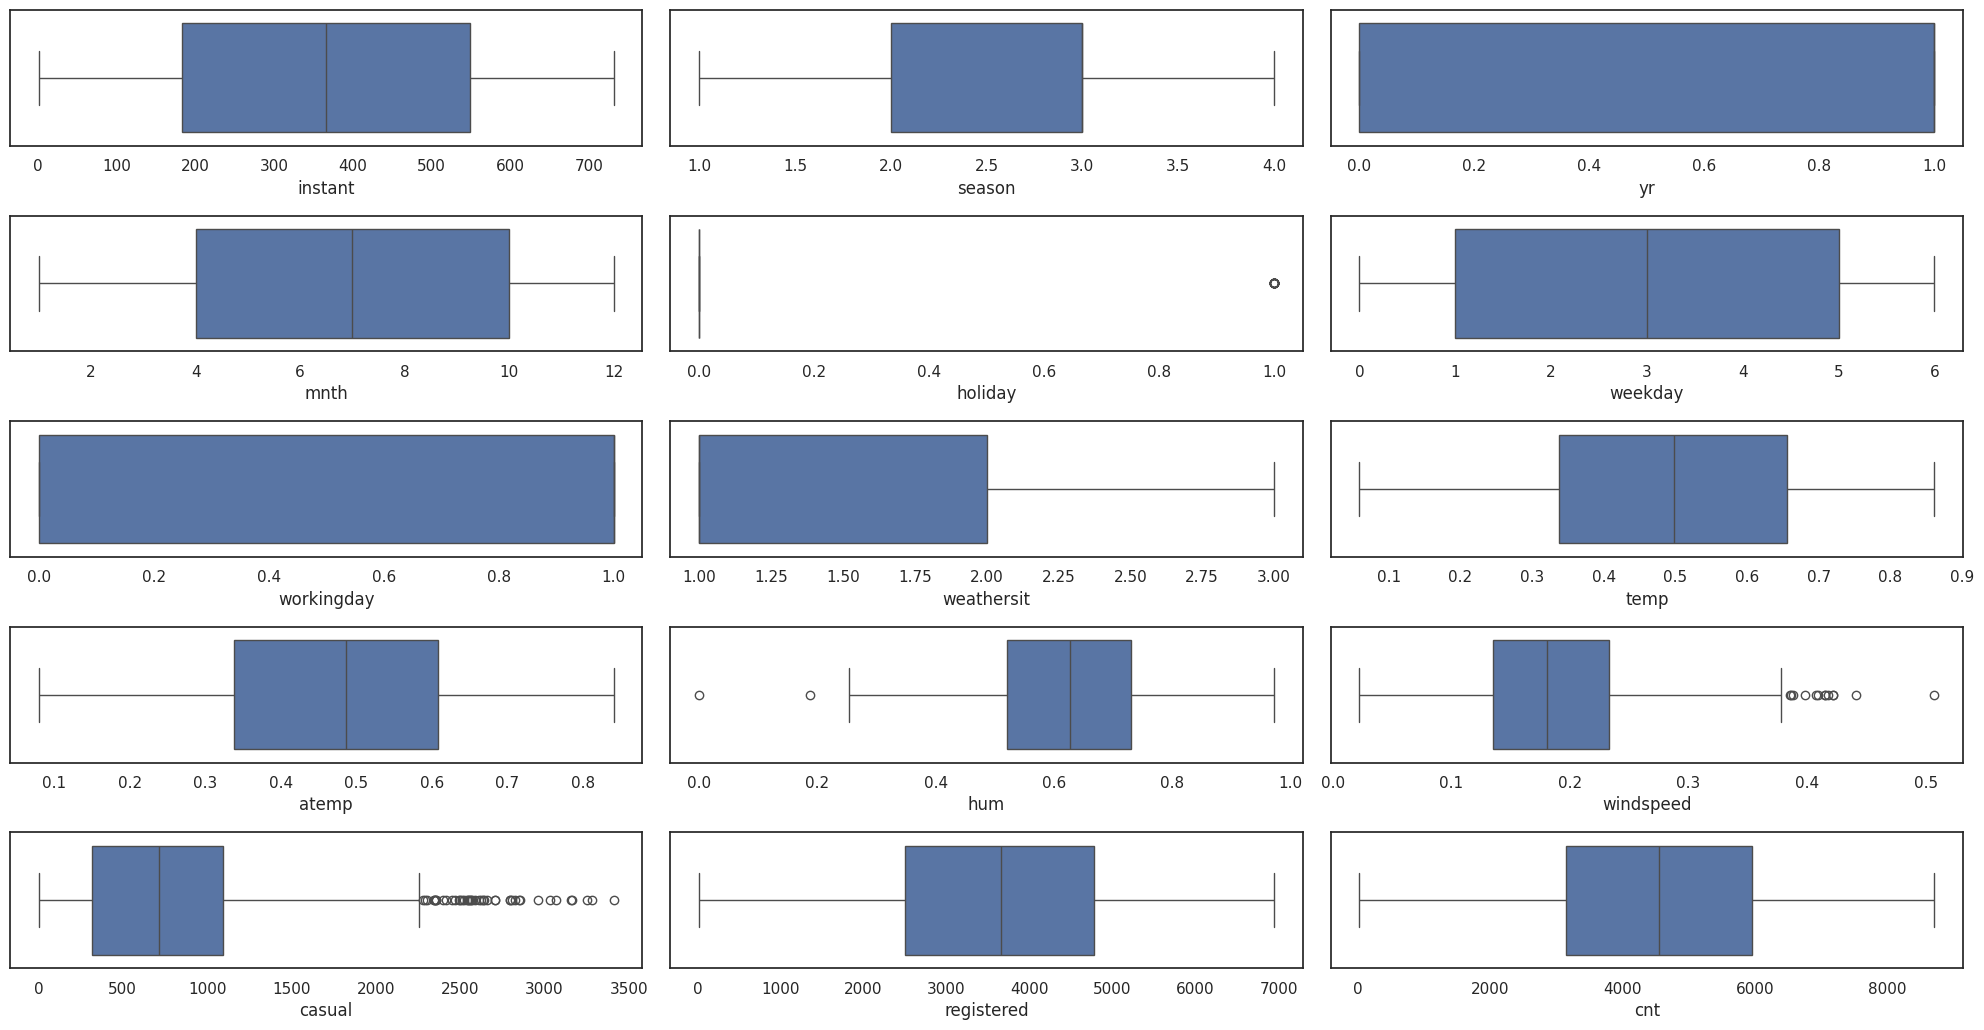

In [ ]:
# Plotting untuk hour_df
plt.figure(figsize=(20, 12))

# Mengatur jumlah baris dan kolom untuk subplots
num_rows = 6
num_cols = 3

for i, column in enumerate(num_columns_day, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=day_df, x=day_df[column])
    plt.tight_layout()

In [ ]:
#memberikan informas mengenai dataFrame 'hour_day'
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


In [ ]:
#Menampilkan Missing values pada DataFrame 'hour_df'
print("Missing Values:\n",hour_df.isna().sum())

Missing Values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
# Menghitung Jumlah Nilai Unik pada DataFrame `hour_df`
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [ ]:
# memilih kolom numerik pada hour_df
num_columns_hour = hour_df.select_dtypes(include=[np.number]).columns
num_columns_hour

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

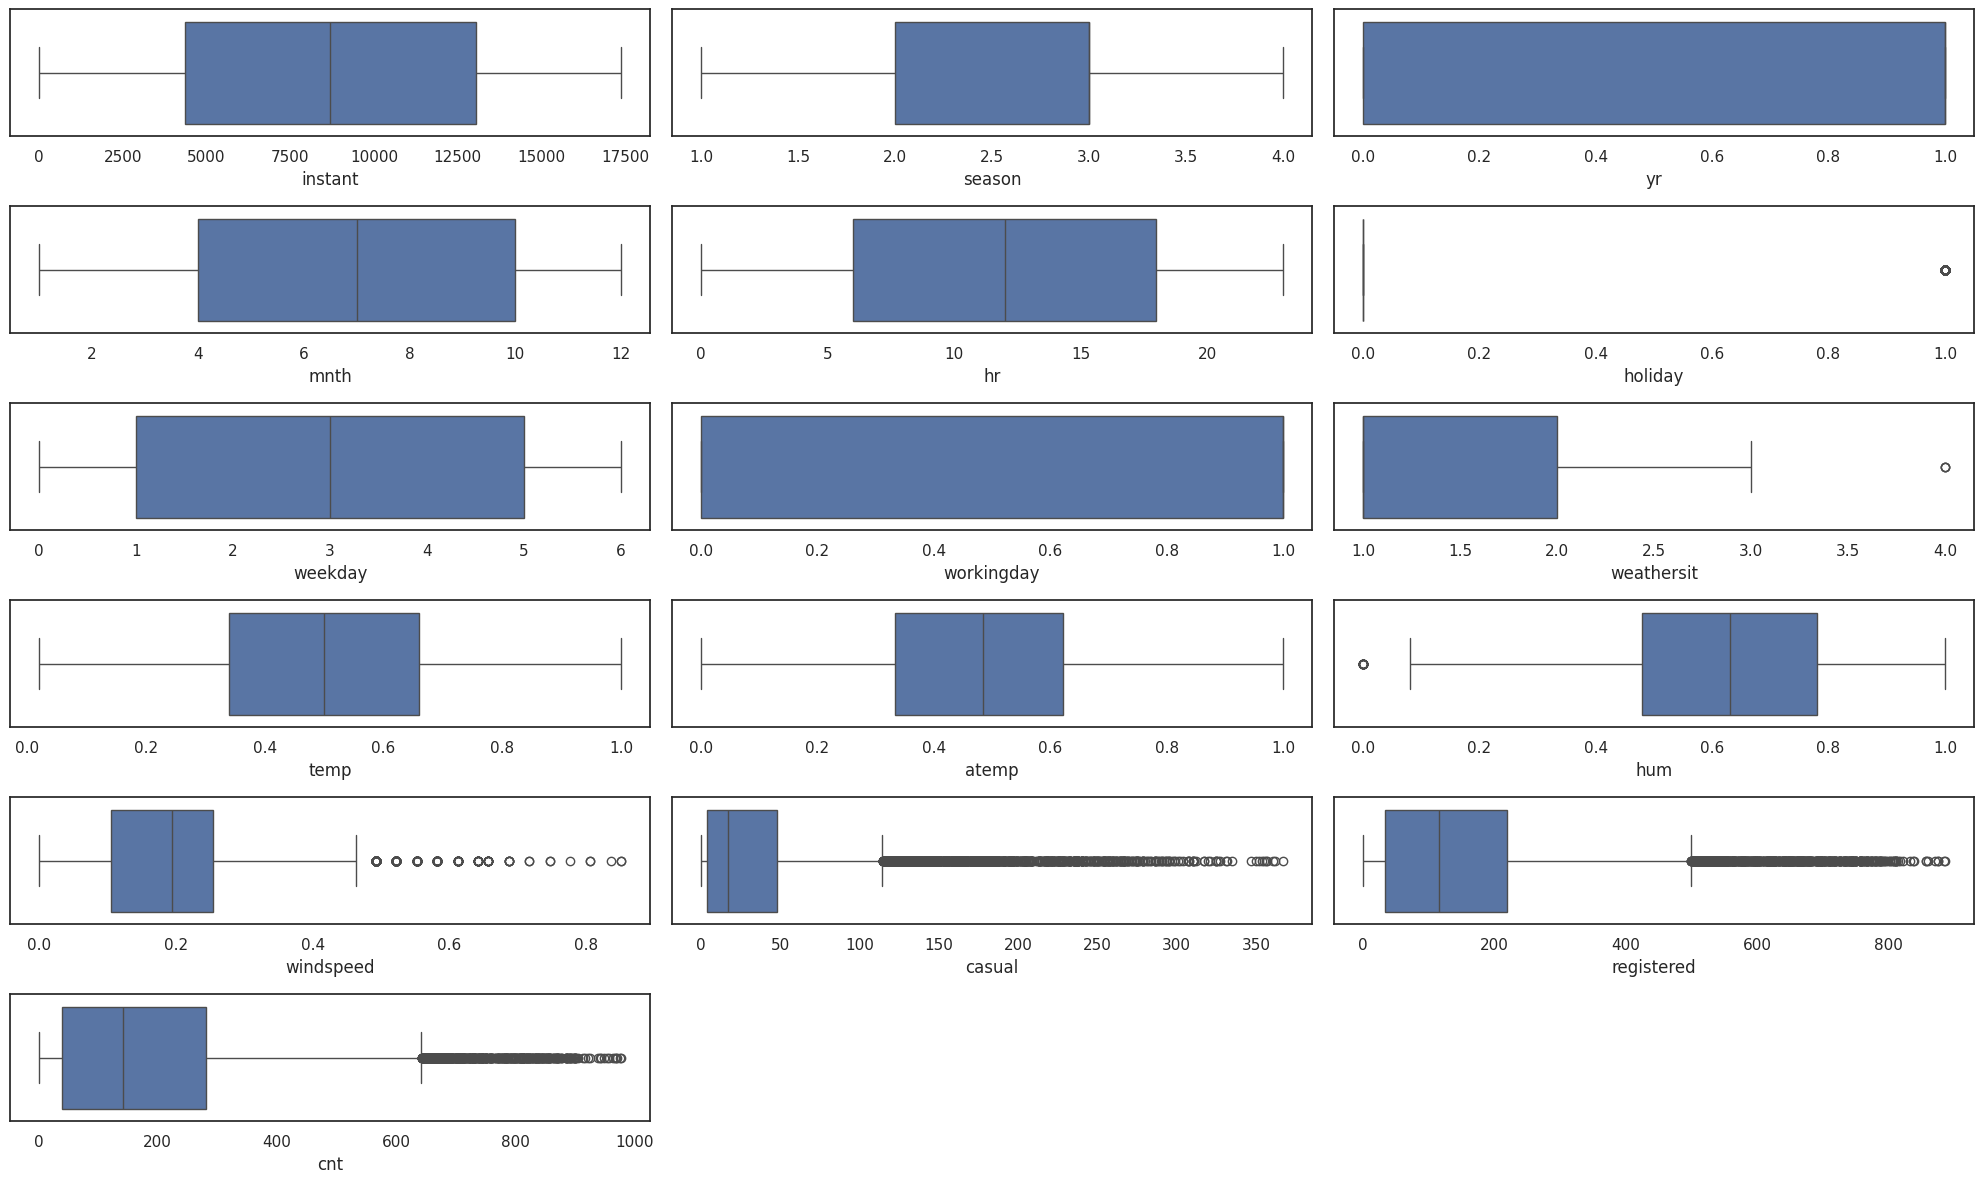

In [ ]:
# Plotting untuk hour_df
plt.figure(figsize=(20, 12))

# Mengatur jumlah baris dan kolom untuk subplots
num_rows = 6
num_cols = 3

for i, column in enumerate(num_columns_hour, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=hour_df, x=hour_df[column])
    plt.tight_layout()

**Insight:**
- Tidak ada data yang duplikasi
- Tidak ada yang missing values
- tipe data dtame yaitu objek harus di ubah ke date

### Cleaning Data

In [ ]:
# Hapus kolom 'instant' pada dataframe day
day_df = day_df.drop(columns=['instant'])

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


In [ ]:
#ubah data dteday pada dataframe day menjadi date
col_need_to_clean = ['dteday']

In [ ]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [ ]:
# Menampilkan Informasi Umum tentang DataFrame `day_df`
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB


In [ ]:
# Hapus kolom 'instant' pada dataframe hour
hour_df = hour_df.drop(columns=['instant'])

In [ ]:
# Menampilkan Informasi Umum tentang DataFrame `hour_df`
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


**Insight:**
- Menghapus kolom 'instant' pada dataset day dan hour
- Mengubah tipe data objek ke datetime yang sebelumnya objek

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Menyajikan Statistik Deskriptif untuk Semua Kolom pada DataFrame `day_df`
day_df.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-01
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31
mean,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN


In [ ]:
#Menghitung Jumlah Nilai Unik pada DataFrame `hour_df`
day_df.nunique()

,0
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499
atemp,690


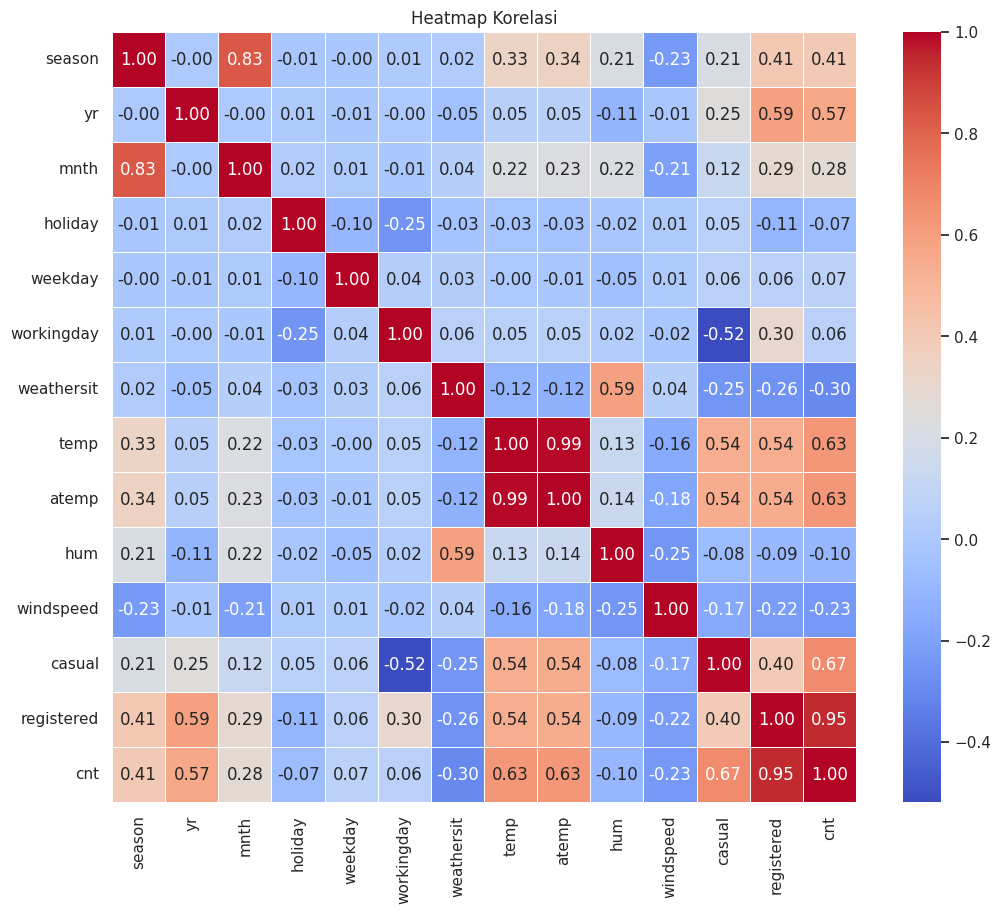

In [ ]:
# Update num_columns_day to exclude 'instant'
num_columns_day = day_df.select_dtypes(include=[np.number]).columns

# Now, the correlation calculation should work without error
plt.figure(figsize=(12, 10))
correlation_matrix = day_df[num_columns_day].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

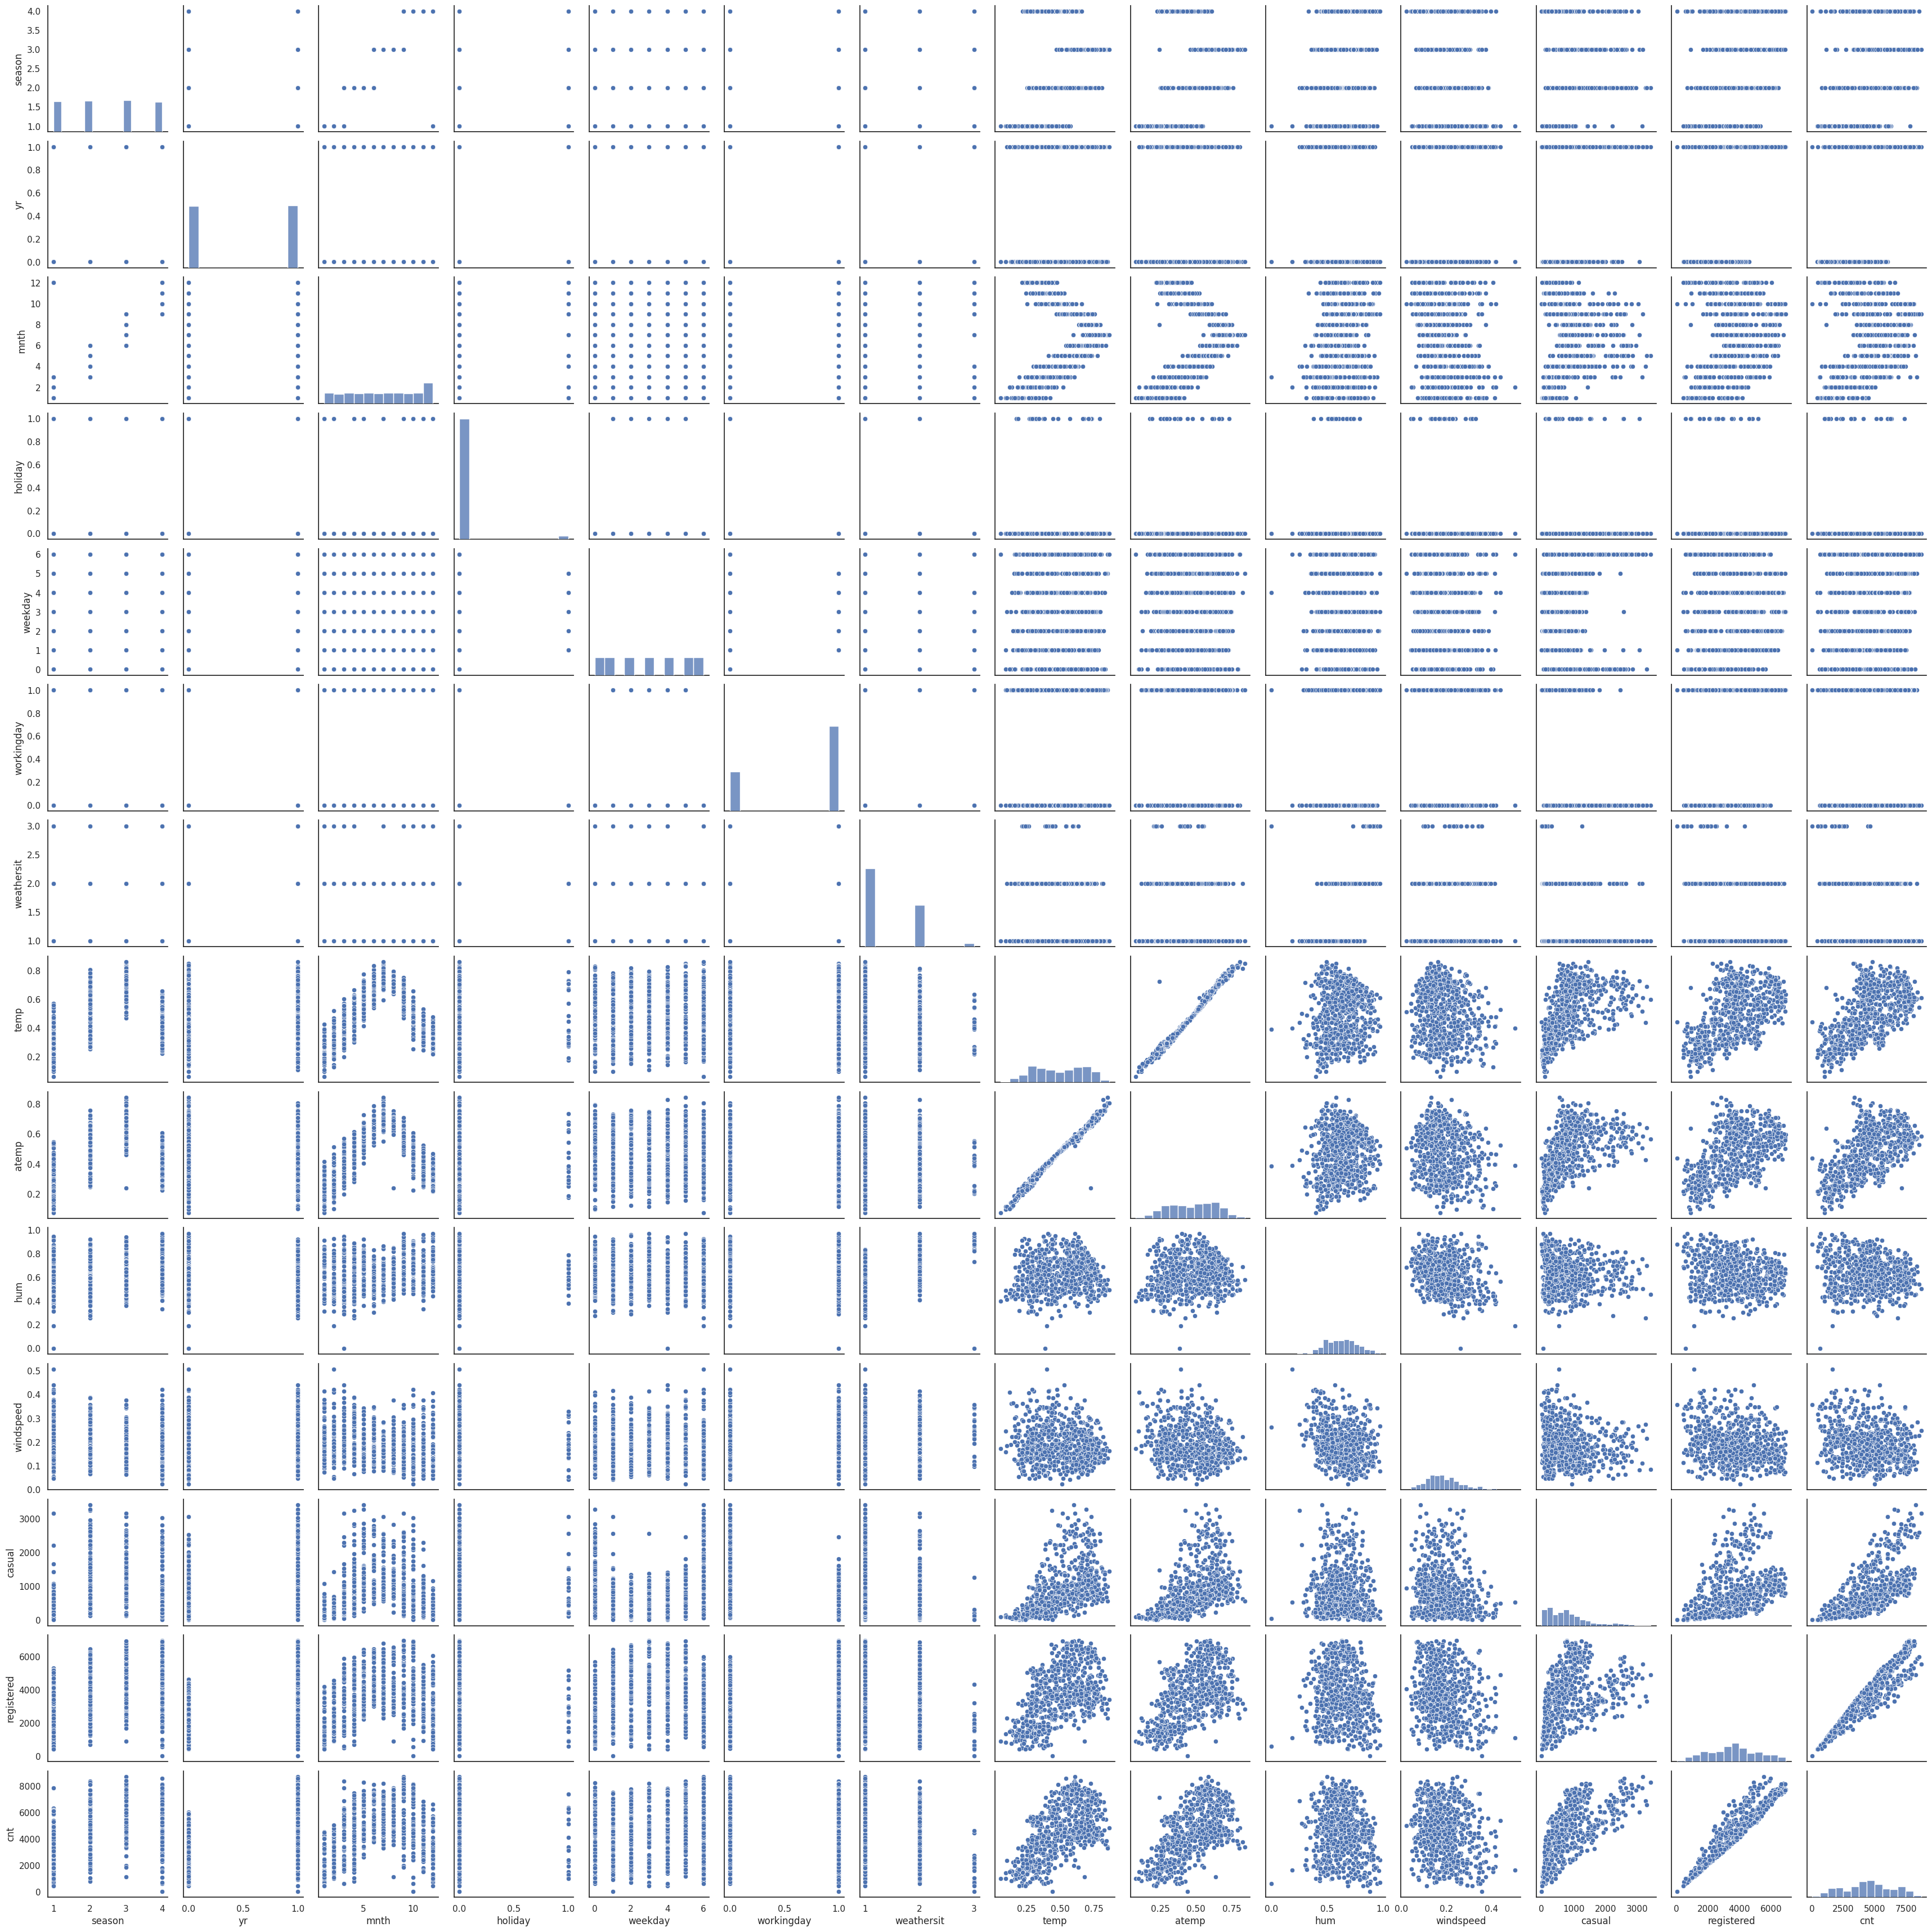

In [ ]:
# Pairplot untuk fitur numerik
sns.pairplot(day_df[num_columns_day]) # Pass day_df as argument
plt.show()

In [ ]:
# Assuming 'cnt' represents the order or rental count
day_df.groupby(by="dteday")['cnt'].count().sort_values(ascending=False).reset_index().head(10)

,dteday,cnt
0,2011-01-01,1
1,2012-04-25,1
2,2012-04-27,1
3,2012-04-28,1
4,2012-04-29,1
5,2012-04-30,1
6,2012-05-01,1
7,2012-05-02,1
8,2012-05-03,1
9,2012-05-04,1


In [ ]:
hour_df.describe(include="all")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [ ]:
#Menghitung Jumlah Nilai Unik pada DataFrame `hour_df`
hour_df.nunique()

,0
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4
temp,50


In [ ]:
num_columns_hour

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

**Insight:**
- Faktor terbesar yang memengaruhi penyewaan sepeda adalah status pengguna (registered dan casual) serta kondisi cuaca (suhu, kecepatan angin dan situasi cuaca).
- Untuk mendorong penggunaan sepeda, penyedia layanan dapat berfokus pada pengguna registered dan memastikan aksesibilitas di kondisi cuaca tertentu.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

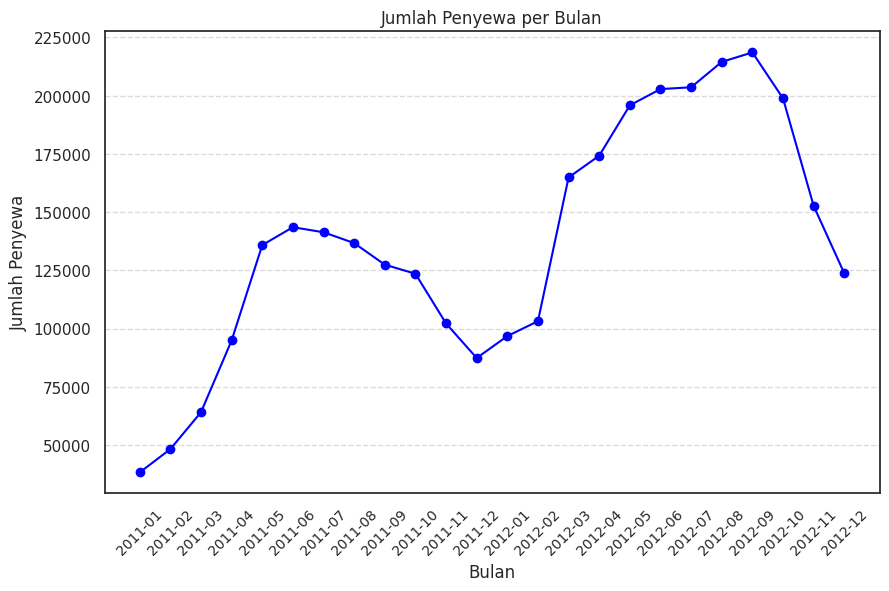

In [ ]:
# Tambahkan kolom nama bulan
day_df['month'] = day_df['dteday'].dt.to_period('M')

# Kelompokkan data berdasarkan musim dan bulan
grouped = day_df.groupby('month')['cnt'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(grouped['month'].astype(str), grouped['cnt'], marker='o', color='blue')
plt.xticks(rotation=45, fontsize=10)
plt.title('Jumlah Penyewa per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewa')

# Menampilkan hanya garis horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Hanya garis horizontal dengan garis putus-putus

# Tampilkan grafik
plt.show()


**Insight**


- Tren kenaikan Awal:Jumlah penyewa meningkat signifikan dari bulan januari 2011 hingga mencapai puncak pertama di sekitar bulan juni 2011.
- Penurunan di Tengah Tahun: Setelah puncak awal, terjadi penurunan jumlah penyewa hingga titik terendah pada bulan Desember 2011.
- Kenaikan Tajam kedua: Setelah itu, jumlah penyewa mengalami kenaikan signifikan lagi di awal tahun 2012 hingga mencapai puncak kedua pada pertengan tahun.
- Fluktuasi Tahunan: Jumlah penyewa perbulan mengalami fluktuasi yang signifikan setiap tahu, dengan pola puncak dan peurunan yang konsisten.
- Musim atau Pola Periodik: Kemungkinan ada faktor musiman atau pola tertentu yang mempegaruhi jumlah penyewa perbulan, terutama pada bulan tertetu yang terlihat stabil dengan jumlah lebih tinggi.
- Anaisis Periode Rendah: Penurunan tajam di beberapa bulan seperti akhir 2011 dan akhir 2012 menunjukkan adanya faktor eksternal yang memengaruhi permintaan.


### Pertanyaan 2:

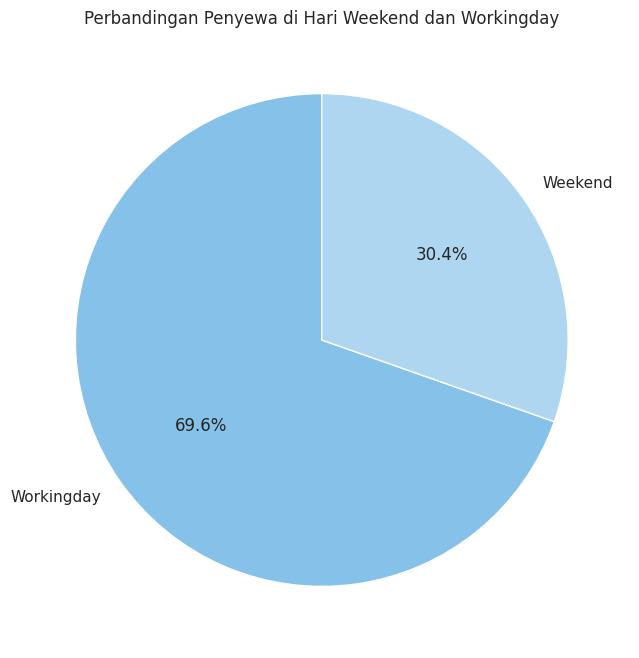

In [ ]:
# Misalnya, kolom 'Label', 'Data A', dan 'Data B' ada di file CSV
workingday = day_df['workingday'].tolist()
weekday = day_df['weekday'].tolist()

# Warna untuk pie chart
colors = ['#85C1E9', '#AED6F1']

# Menghitung jumlah penyewa untuk workingday dan weekend
# Mengasumsikan 'workingday' bernilai 1 untuk hari kerja dan 0 untuk akhir pekan
workingday_cnt = day_df[day_df['workingday'] == 1]['cnt'].sum()
weekend_cnt = day_df[day_df['workingday'] == 0]['cnt'].sum()

# Data untuk pie chart
sizes = [workingday_cnt, weekend_cnt]
labels = ['Workingday', 'Weekend']

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Perbandingan Penyewa di Hari Weekend dan Workingday')

# Menampilkan grafik
plt.show()

**Insight**

- Ditribusi Penyewa : Sebagian besar penyewa melakukan aktivitas di hari kerja (workig day), dengan presentase sebesar 69,6%. Sementara itu, aktivitas peyewaan pada akhir pekan (weekend) hanya sebesar 30,4%.
- Konsisten Aktivtas : Tingginya presentase pada hari kerja menunjukkan bahwa layanan ditawarkan lebih banyak digunakan untuk kebutuhan rutin atau aktivitas harian dibandingkan rekreasi atau kegiatan santai yang biasaya dominan di akhir pekan.
- Target Strategis : Strategis pemasaran dan operasional dapat lebih di fokuskan pada hari kerja, mengingat demand yang lebih tinggi pada periode tersebut.

## Analisis Lanjutan (Opsional)

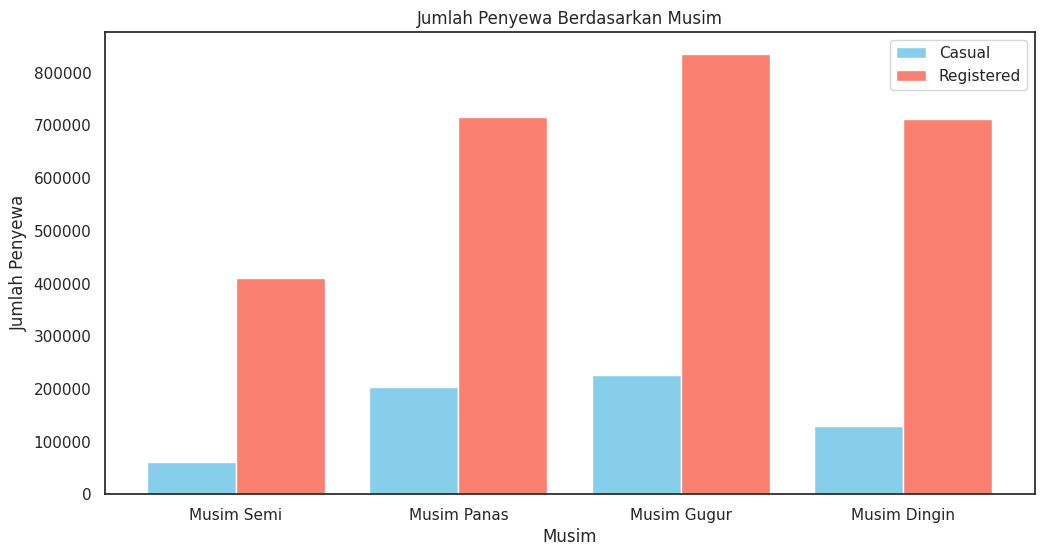

In [ ]:
# Mengelompokkan data dan menghitung jumlah penyewa casual dan registered berdasarkan musim
grouped_df = day_df.groupby('season')[['casual', 'registered']].sum().reset_index()

# Mengatur gaya untuk visualisasi tanpa grid
sns.set(style='white')  # Atur gaya tanpa grid

# Membuat diagram batang
plt.figure(figsize=(12, 6))
plt.bar(grouped_df['season'] - 0.2, grouped_df['casual'], width=0.4, label='Casual', color='skyblue')
plt.bar(grouped_df['season'] + 0.2, grouped_df['registered'], width=0.4, label='Registered', color='salmon')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewa')
plt.title('Jumlah Penyewa Berdasarkan Musim')
plt.xticks(grouped_df['season'], ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])

# Menghilangkan grid grid
plt.grid(False)

# Menambahkan legenda dan menampilkan plot
plt.legend()
plt.show()

**Insight**


- Penyewaan Tertinggi: Jumlah penyewa tertinggi pada musim gugur, baik untuk kategori *registered* maupun casual
- Dominasi Pengguna Registered: Pada semua musim, jumlah penyewa kategori registered selalu lebih tinggi dibandingkan kategori casual. Ini menunjukkan mayoritas pengguna adalah pelanggan tetap atau anggota tedaftar
- Musim Panas dan Gugur yang Populer: Selain musim gugur, musim panas juga menunjukkan angka penyewaan yang cukup tinggi, khususnya untuk kategori registered. Ini mungkin terkait dengan cuaca yang mendukung aktivtas luar ruangan.
- Penyewaan Rendah pada Musim Dingin: Jumlah penyewa terendah terjadi pada musim dingin, kemungkinan karenafaktor cuaca yang kurang mendukung untuk aktivitas di luar.
- Kesempatan untuk Menarik Penyewa Casual: Pada semua musim, jumlah penyewa casual lebih rendah dibandingkan registered. Ini bisa menjadi peluang untuk meningkatkan penyewaan dari kategori ini dengan promosi atau program yang menarik.


## Conclusion

**Conclution pertanyaan 1**
- Tren Kenaikan Awal: Jumlah penyewa meningkat secara signifikan dari Januari 2011 hingga mencapai puncak pertama pada Juni 2011.
- Penurunan di Tengah Tahun: Setelah puncak awal, terjadi penurunan jumlah penyewa hingga mencapai titik terendah pada Desember 2011.
- Kenaikan Tajam Kedua: Awal tahun 2012 menunjukkan kenaikan yang signifikan hingga mencapai puncak kedua pada pertengahan tahun.
- Fluktuasi Tahunan: Jumlah penyewa per bulan mengalami pola fluktuasi yang konsisten setiap tahun, dengan puncak pada pertengahan tahun dan penurunan di akhir tahun.
- Periode Rendah: Penurunan tajam pada akhir 2011 dan 2012 mungkin dipengaruhi oleh faktor eksternal seperti cuaca atau perayaan tertentu.

**Conclution pertanyaan 2**
- Distribusi Penyewa: Sebagian besar aktivitas penyewaan terjadi pada hari kerja (69.6%), sedangkan akhir pekan hanya menyumbang 30.4%.
- Konsistensi Aktivitas: Tingginya aktivitas pada hari kerja menunjukkan bahwa layanan penyewaan lebih sering digunakan untuk kebutuhan rutin atau aktivitas harian, bukan sekadar rekreasi.
- Target Strategis: Strategi pemasaran dapat lebih difokuskan pada hari kerja, seperti menawarkan paket langganan untuk pelanggan tetap atau promosi yang mendukung aktivitas kerja.

**Conclution pertanyaan 3**
- Penyewaan Tertinggi: Jumlah penyewa tertinggi tercatat pada musim gugur untuk kedua kategori, registered dan casual.
- Dominasi Pengguna Registered: Penyewa dari kategori registered secara konsisten lebih tinggi dibanding casual di semua musim, menunjukkan mayoritas pengguna adalah pelanggan tetap.
- Musim Panas dan Gugur yang Populer: Selain musim gugur, musim panas juga menjadi waktu populer untuk penyewaan, terutama bagi pengguna kategori registered, kemungkinan karena cuaca yang mendukung.
- Penyewaan Rendah di Musim Dingin: Musim dingin memiliki jumlah penyewaan terendah, yang mungkin disebabkan oleh cuaca yang kurang mendukung aktivitas luar ruangan.
- Peluang Peningkatan Penyewa Casual: Dengan jumlah penyewa casual yang lebih rendah, terdapat peluang untuk meningkatkan angka penyewaan dengan promosi musiman, diskon, atau aktivitas yang lebih menarik bagi pelanggan baru atau rekreasi.

**Rekomendasi**
- Peningkatan Promosi pada Musim Dingin dan Akhir Tahun: Untuk mengatasi penurunan penyewaan, tawarkan program seperti diskon, promosi liburan, atau kampanye khusus musim dingin.
- Fokus pada Hari Kerja: Perkuat layanan dan penawaran pada hari kerja untuk memenuhi permintaan pelanggan tetap, seperti paket langganan bulanan atau harian.
- Strategi untuk Penyewa Casual: Tingkatkan ketertarikan pelanggan casual dengan menghadirkan acara komunitas, bundling promosi, atau diskon pada akhir pekan.
- Diversifikasi Layanan Musiman: Sesuaikan strategi pemasaran dengan musim yang memiliki potensi penyewaan tinggi, seperti musim panas dan gugur, untuk memaksimalkan pendapatan.
- Pengembangan Infrastruktur: Pastikan jalur sepeda dan fasilitas pendukung lebih optimal pada musim dengan permintaan tinggi untuk meningkatkan kepuasan pelanggan.

In [ ]:
!pip freeze requirements.text

absl-py==1.4.0
accelerate==1.1.1
aiohappyeyeballs==2.4.4
aiohttp==3.11.9
aiosignal==1.3.1
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.20.0
astropy==6.1.7
astropy-iers-data==0.2024.12.2.0.35.34
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.27.0
bigquery-magics==0.4.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==2.7.1
bokeh==3.6.2
Bottleneck==1.4.2
bqplot==0.12.43
branca==0.8.0
CacheControl==0.14.1
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.0
chex==0.1.87
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.20.0
cloudpickle==3.1.0
cmake==3.30.5
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy==1.

In [ ]:
day_df.to_csv('data_1.csv', index=False)

In [ ]:
hour_df.to_csv('data_2.csv', index=False)